In [1]:
import sys
sys.path.append('..')
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader
from models.basic_axial.basic_axialnet import BasicAxial, AxialUNetMed
from models.basic_axial.basic_axial_parts import BlockAxialDown, BlockAxial, BlockAxialUp, conv1x1
from models.lbcnn.lbcnn_parts import ConvLBP, BlockLBP
from models.lbcnn.axial_lbcnn import BlockAxialLBC
from datasets.ice import Ice, IceWithProposals
from metrics.segmentation import _fast_hist, per_class_pixel_accuracy, jaccard_index
from metrics.utils import display_metric_list
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = '../data'
img_scale = .35
img_crop = 220

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

test_set = Ice(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), 'test', img_scale, img_crop)
test_loader = DataLoader(test_set, batch_size=1)

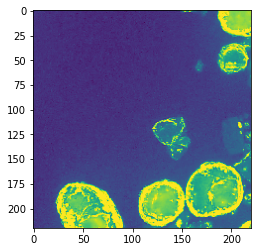

In [3]:
batch = test_set[0]
img = batch['image'].unsqueeze(0)
plt.imshow(img.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,0]);

In [4]:
block = BlockAxialLBC(3, 10)
out = block(img)
print(out.shape)

torch.Size([1, 10, 220, 220])


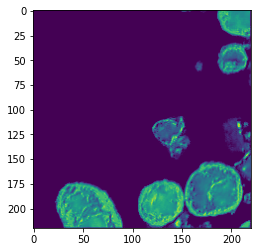

In [14]:
plt.imshow(out.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,9]);

In [9]:
batch_norm = nn.BatchNorm2d(3)
conv_lbp = ConvLBP(3, 3, kernel_size=3, sparsity=0.5)
x = batch_norm(img)
x = F.relu(conv_lbp(x))
print(x.shape)

torch.Size([1, 3, 220, 220])


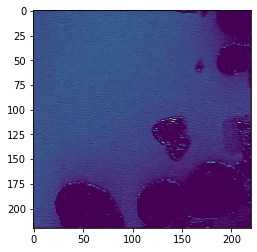

In [12]:
plt.imshow(x.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,2]);

In [5]:
lbp = BlockLBP(3, 10)
out = lbp(img)
print(out.shape)

torch.Size([1, 3, 220, 220])


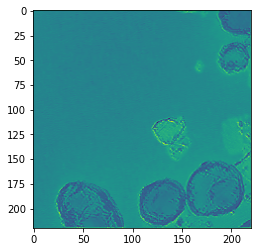

In [9]:
plt.imshow(out.squeeze(0).permute(1,2,0).detach().cpu().numpy()[:,:,0]);

In [12]:
import matplotlib.pyplot as plt
for i in range(1, 51):
    test = plt.imread(f'/home/dsola/repos/PGA-Net/src/data/imgs/img_{i}.tif')
    print(f'img {i}: {test.max()}')

img 1: 1.0
img 2: 255
img 3: 255
img 4: 255
img 5: 255
img 6: 255
img 7: 255
img 8: 255
img 9: 255
img 10: 255
img 11: 255
img 12: 255
img 13: 255
img 14: 255
img 15: 255
img 16: 255
img 17: 255
img 18: 255
img 19: 255
img 20: 255
img 21: 255
img 22: 255
img 23: 255
img 24: 255
img 25: 255
img 26: 255
img 27: 255
img 28: 255
img 29: 255
img 30: 255
img 31: 255
img 32: 255
img 33: 255
img 34: 255
img 35: 255
img 36: 255
img 37: 255
img 38: 255
img 39: 255
img 40: 255
img 41: 255
img 42: 255
img 43: 255
img 44: 255
img 45: 255
img 46: 255
img 47: 255
img 48: 255
img 49: 255
img 50: 255


In [2]:
test.max()

255

In [3]:
test2 = plt.imread('/home/dsola/Downloads/images/img_27.tif')

In [4]:
test2.max()

255

In [5]:
import sys
import os
sys.path.append('..')
from datasets.ice import Ice, IceWithProposals, BasicDatasetIce
data_dir = '../data'
img_scale = .35
img_crop = 320
test_set1 = Ice(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), 'test', img_scale, img_crop)

In [6]:
img1 = test_set1[2]['image']

In [7]:
img1.max()

tensor(-2.0459)

In [8]:
test_set2 = BasicDatasetIce(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), 'test', img_scale)

In [9]:
img2 = test_set2[2]['image']

In [10]:
img2.max()

tensor(255.)